## Simulazione dell'esame di Metodi Numerici


In [91]:
import numpy as np
import numpy.linalg as npl
import scipy.linalg as spl
import matplotlib.pyplot as plt
from SolveTriangular import *

## Esercizio 1


# Esercizio 1
Nel file ``testI.mat`` sono memorizzati la matrice A ed il vettore b. 


   **Totale: Punti 11**

Per la lettura dei dati procedere nel seguente modo:

``from scipy.io import loadmat``

``import numpy as np``

``dati = loadmat('testI.mat')``

``A=dati["A"] ``

``A=A.astype(float)``

`` b=dati["b"] ``

`` b=b.astype(float)``







In [4]:
from scipy.io import loadmat
dati = loadmat('testI.mat')
A = dati["A"]
b = dati["b"]
A = A.astype(float)
b = b.astype(float)

 - Verificare che per risolvere il sistema Ax=b sia possibile utilizzare i due metodi di discesa visti a lezione. Richiamare il teorema che  garantisce che risolvere un sistema lineare con specifiche proprietà equivale a trovare il minimo di un opportuni funzionale quadratico.  [**Punti 2**]

In [13]:
m, n = A.shape
print("È quadrata:", m == n)

print("Simmetrica:", np.all(A.T == A))

print("Definita Positiva:", np.all(npl.eigvals(A)) > 0)
# Posso usare i metodi di discesa del gradiente

È quadrata: True
Simmetrica: True
Definita Positiva: True


 - implementare entrambi gli algoritmi e dire quante iterazioni sono necessarie per ciascuno di essi  per calcolare la soluzione con una toll=1e-6 e maxit=4000. Visualizzare in un grafico l'errore in scala logaritmica ad ogni iterazione per ciascuno dei due metodi. [**Punti 5**]

In [23]:
def steepestdescent(A, b, x0, itmax, tol):

    n, m = A.shape
    if n != m:
        print("Matrice non quadrata")
        return [], []

    # inizializzare le variabili necessarie
    x = x0

    r = A @ x - b
    p = -r
    it = 0
    nb = np.linalg.norm(b)
    errore = np.linalg.norm(r) / nb
    vec_sol = []
    vec_sol.append(x)
    vet_r = []
    vet_r.append(errore)

    # utilizzare il metodo del gradiente per trovare la soluzione
    while it <= itmax and errore >= tol:
        it = it + 1
        Ap = A @ p

        alpha = -(r.T @ p) / (p.T @ Ap)

        x = x + alpha * p

        vec_sol.append(x)
        r = r + alpha * Ap
        errore = np.linalg.norm(r) / nb
        vet_r.append(errore)
        p = -r

    return x, vet_r, vec_sol, it

def conjugate_gradient(A, b, x0, itmax, tol):
    n, m = A.shape
    if n != m:
        print("Matrice non quadrata")
        return [], []

    # inizializzare le variabili necessarie
    x = x0

    r = A @ x - b
    p = -r
    it = 0
    nb = np.linalg.norm(b)
    errore = np.linalg.norm(r) / nb
    vec_sol = []
    vec_sol.append(x0)
    vet_r = []
    vet_r.append(errore)
    # utilizzare il metodo del gradiente coniugato per calcolare la soluzione
    while errore >= tol and it < itmax:
        it = it + 1
        Ap = A @ p
        alpha = -(r.T @ p) / (p.T @ Ap)
        x = x + alpha * p
        vec_sol.append(x)
        rtr_old = r.T @ r
        r = r + alpha * Ap
        gamma = (r.T @ r) / rtr_old
        errore = np.linalg.norm(r) / nb
        vet_r.append(errore)
        p = -r + gamma * p

    return x, vet_r, vec_sol, it

Steepest: it-> 4001
Conjugate: it-> 332


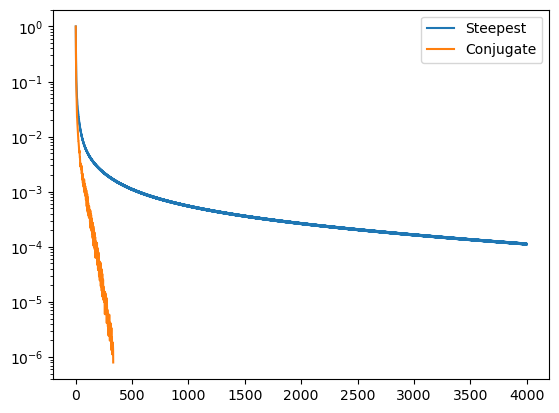

In [43]:
toll = 1e-6
maxit = 4000
x0 = np.zeros_like(b)

xs, vrs, vxs, its = steepestdescent(A, b, x0, maxit, toll)
print("Steepest: it->", its)
xc, vrc, vxc, itc = conjugate_gradient(A, b, x0, maxit, toll)
print("Conjugate: it->", itc)

plt.semilogy(np.arange(its+1), vrs, np.arange(itc+1), vrc)
plt.legend(["Steepest", "Conjugate"])
plt.show()

 - Verificare se la matrice è  malcondizionata, dire teoricamente cosa questo implica in termini di velocità di  convergenza alla soluzione di ciascuno dei due metodi, richiamando il risultato teorico visto a lezione. [**Punti 2**]

In [47]:
npl.cond(A, 2)
# maggiore è l'indice di condizionamento, 
# minore è la velocità di convergenza dell'algoritmo

np.float64(9999.999999996193)

 - Costruire la matrice A1, ottenuta a partire da A sommandole una matrice diagonale con elementi sulla
      diagonali tutti uguali a 0.05
   nel seguente modo:
   
   A1=A+np.eye(A.shape[0])*0.05
   
   e termine noto b1, costruito in maniera tale che la soluzione del sistema A1 x1 =b1 sia il vettore formato da tutti 1.  Risolvere il sistema lineare con matrice dei coefficienti A1 e termine noto b1, sia con il metodo del gradiente che con il metodo del gradiente coniugato. Osservare il numero di iterazioni eseguito da ciascun metodo e giustificare i risultati  [**Punti 2**]

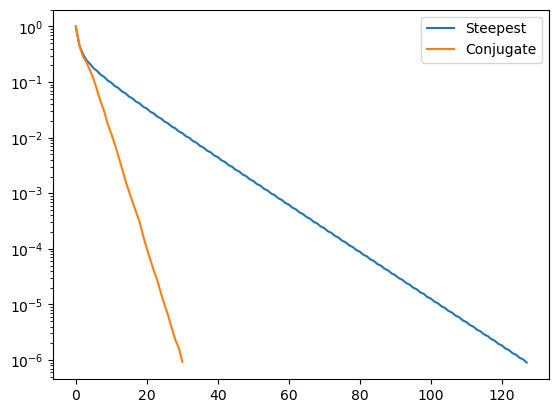

In [68]:
A1 = A + np.eye(A.shape[0]) * 0.05
b1 = A1.sum(axis=1).reshape(A1.shape[0], 1)

xs, vrs, vxs, its = steepestdescent(A1, b1, x0, maxit, toll)
xc, vrc, vxc, itc = conjugate_gradient(A1, b1, x0, maxit, toll)

plt.semilogy(np.arange(its+1), vrs, np.arange(itc+1), vrc)
plt.legend(["Steepest", "Conjugate"])
plt.show()

## Esercizio 2 ##

Siano assegnati i numpy array

x =[1.0,1.2,1.4,1.6,1.8,2.0,2.2,2.4,2.6,2.8,3.0] 

y =[1.18,1.26,1.23,1.37,1.37,1.45,1.42,1.46,1.53,1.59,1.59] 
                                                               
contenenti rispettivamente le ascisse e le ordinate di 11 punti nel piano.                                                          

In [71]:
x = np.array([1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4, 2.6, 2.8, 3.0])
y = np.array([1.18, 1.26, 1.23, 1.37, 1.37, 1.45, 1.42, 1.46, 1.53, 1.59, 1.59])
# stessa dimensione

Scrivere lo script python in cui:

- si calcola il polinomio di approssimazione ai minimi quadrati di grado 1 dei punti assegnati, sviluppando le functions necessarie. e lo si valuti su 200 punti equidistanti nell'intervallo [1,3]  [**Punti: 4**]

In [95]:
def eqnorm(A, b):
    # Risolve un sistema sovradeterminato con il metodo delle equazioni normali
    G = A.T @ A

    f = A.T @ b

    L = spl.cholesky(G, lower=True)
    U = L.T

    z, _= Lsolve(L, f)
    x, _ = Usolve(U, z)

    return x

Cond: 8.419376035116738
Residuo: 0.009981818181818205


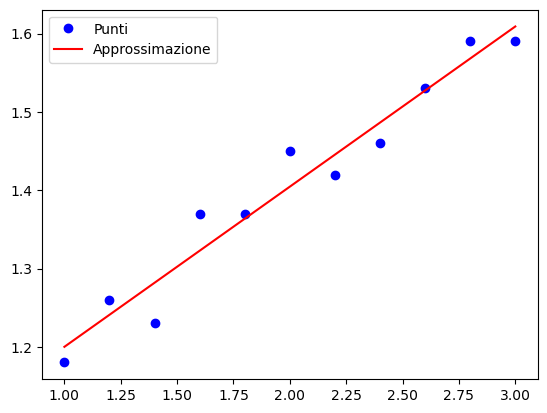

In [115]:
m = x.size
n = 1
n1 = n + 1

AA = np.vander(x, increasing=True)[:, :n1]
print("Cond:", npl.cond(AA))

sol = eqnorm(AA, y)
res = npl.norm(AA @ sol - y.reshape(m, 1)) ** 2
print("Residuo:", res)

xx = np.linspace(x.min(), x.max(), 100)
yy = np.polyval(np.flip(sol), xx)
plt.plot(x, y, 'bo', xx, yy, 'r')
plt.legend(["Punti", "Approssimazione"])
plt.show()


- si calcola il polinomio di interpolazione dei punti assegnati sviluppando le functions necessarie e lo si valuti su 200 punti equidistanti nell'intervallo [1,3]  [**Punti: 4**]

In [122]:
def plagr(xnodi, j):
    """
    Restituisce i coefficienti del j-esimo pol di
    Lagrange associato ai punti del vettore xnodi
    """
    xzeri = np.zeros_like(xnodi)
    n = xnodi.size
    if j == 0:
        xzeri = xnodi[1:n]
    else:
        xzeri = np.append(xnodi[0:j], xnodi[j + 1 : n])  # to do)

    num = np.poly(xzeri)
    den = np.polyval(num, xnodi[j])

    p = num / den

    return p

def InterpL(x, y, xx):
    """ "
    %funzione che determina in un insieme di punti il valore del polinomio
    %interpolante ottenuto dalla formula di Lagrange.
    % DATI INPUT
    %  x  vettore con i nodi dell'interpolazione
    %  f  vettore con i valori dei nodi
    %  xx vettore con i punti in cui si vuole calcolare il polinomio
    % DATI OUTPUT
    %  y vettore contenente i valori assunti dal polinomio interpolante
    %
    """
    n = x.size
    m = xx.size
    L = np.zeros((m, n))
    for j in range(n):
        p = plagr(x, j)
        L[:, j] = np.polyval(p, xx)

    return L @ y

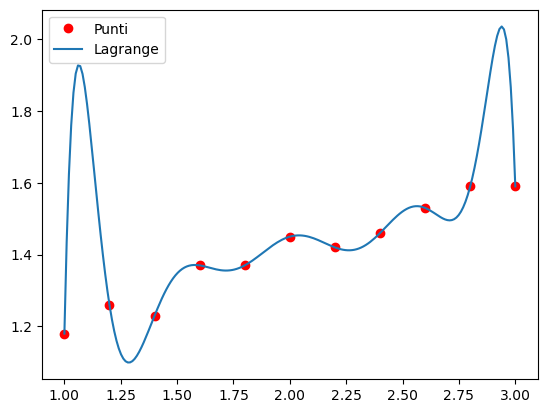

In [124]:
xx = np.linspace(1, 3, 200)
yy = InterpL(x, y, xx)

plt.plot(x, y, 'ro', xx, yy)
plt.legend(["Punti", "Lagrange"])
plt.show()

- Si modifichino le ordinate dei punti assegnati, facendo uso della formula   $\hat{y_i}=2*x_i+1$, $i=1,...,11$, e si ricalcoli il polinomio interpolante ed il polinomio di approssimazione di grado 1, a partire dalle coppie $(x_i,\hat{y_i})$, $i=1,11$   [**Punti: 1**]

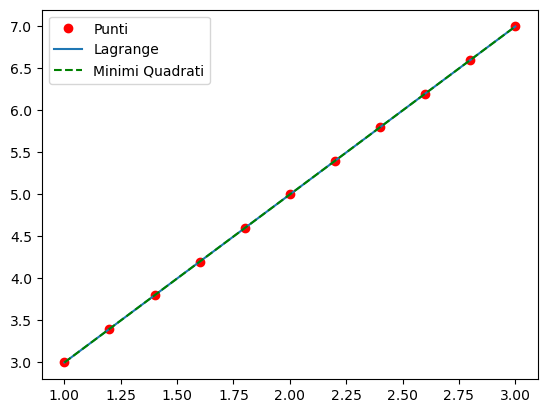

In [141]:
x = np.array([1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4, 2.6, 2.8, 3.0])
y = np.array([1.18, 1.26, 1.23, 1.37, 1.37, 1.45, 1.42, 1.46, 1.53, 1.59, 1.59])

yi = lambda x: 2 * x + 1
y = yi(x)
yy = InterpL(x, y, xx)

AA = np.vander(x, n1, increasing=True)
sol = eqnorm(AA, y)
res = npl.norm(AA @ sol - y.reshape(AA.shape[0], 1)) ** 2
mq = np.polyval(np.flip(sol), x)

plt.plot(x, y, 'ro', xx, yy, x, mq, 'g--')
plt.legend(["Punti", "Lagrange", "Minimi Quadrati"])
plt.show()

- Si visualizzi in un grafico il polinomio interpolante, il polinomio di approssimazione di grado 1 ed i punti $(x_i,y_i)$, i=1,11 ed in un altro grafico il polinomio interpolante, il polinomio di approssimazione di grado 1 ed i $(x_i,\hat{y_i})$, $i=1,11$  [**Punti:1**]

- Si fornisca una spiegazione teorica dei risultati ottenuti
  [**Punti: 4**]

                                                                        Totale 14 punti

## Domanda intelligenza artificiale

- Importanza del learning rate nell'allenamento di una rete neurale 
[**Punti: 1**]
- Illustra l'algoritmo di backpropagation per il calcolo delle derivate parziale della funzione costo rispetto ai pesi di tutti i layer, nel caso di una MLP con 1 nodo di input, 3 layer nascosti formati da un solo nodo, ed 1 nodo di output. [**Punti: 4**] 
 
- Tecniche di Ottimizzazione: metodo di discesa del gradient batch, metodo del gradiente stocastico (SGD) ,metodo del gradiente stocastico minibatch. [**Punti: 2**]


    [**Totale: punti 7**]
